## 기초통계검정방법론
- 모수 통계
-- A 통계검정 방법론 (가정1, 가정2, 가정3 모두 충족할 때)


- 비모수 통계(=모수가 아닌 통계)

## 베이지안 통계 vs 모수 통계
- 모수 통계 : 평균에 기반한 통계 검정
- 베이지안 통계 : 확률에 기반한 통계 검정 (경북대 통계학과 교수)

## t-test : z-test
- 평균의 비교
- z-test 용어
  : 실무에서 정말 쓸모없는 test
- 전제 조건
  : 모집단의 평균과 표준편차를 알아야 함
- 가설 검정
  + 귀무가설 : 표본평균이 모집단의 평균과 같음
  + 대립가설 : 표본평균이 모집단의 평균과 같지 않음
- 왜 이걸 검정하는가?
  + 추출된 표본이 동일 모집단에 실제로 속하는지 가설 검증

### 예제
- 모집단의 평균과 표준편차를 알고 있음
  + 평균 : 67.5 (심리학 점수)
  + 표준편차 : 9.5

In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


In [7]:
df['grades'].min(), df['grades'].max()

(50, 89)

### 시각화
- 평균이 67.5, 표준편차가 9.5인 그래프 작성
- 모집단의 수는 100개
- 히스토그램이 의미하는 것은 20개의 샘플을 추출함

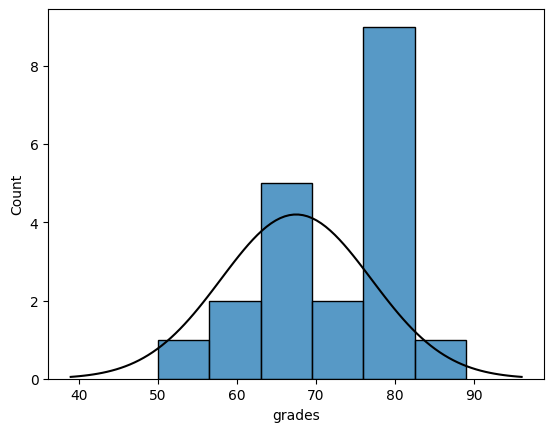

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 67.5
sigma = 9.5

# 정규분포를 만들기 위한 코드
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = 100 * stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df['grades'])
ax2 = sns.lineplot(x=x, y=y, color='black')
plt.show()

### 가설 세우기
- 귀무가설 : 표본샘플(N=20)의 평균은 67.5이다
- 대립가설 : 표본샘플(N=20)의 평균은 67.5가 아니다

In [9]:
import statistics
statistics.mean(df['grades'])

72.3

- 모집단의 평균 67.5
- 표본의 평균 72.3
--> 모집단의 평균과 표본의 평균은 다르다고 볼 수 있을까요?
---> 상식적인 분석, 두 평균 다름!


통계분석**
- 돌다리도 한번 두드려보고 건너가자!!

--> 우연히 샘플링 에러로 72.3 나올 수도 있겠죠?
--> 결정을 어떻게 내릴까?
----> 통계 검정을 하겠다!

### z-통계량
- 각 데이터 값이 평균으로부터 얼마나 떨어져 있는지를 나타내는 통계량
  + 표준화된 수치

In [12]:
grades = df['grades'] # 모평균? 샘플?
sample_mean = statistics.mean(grades)
sample_mean # 표본의 평균값
sd_true = 9.5 # 모집단=표본의 표준편차
mu_null = 67.5 # 모집단의 평균값
N = len(grades) # 표본의 크기

In [13]:
# 표준오차 / 표준편차
import math
sem_true = sd_true / math.sqrt(N)
sem_true

2.1242645786248002

In [17]:
# z_score(=z 통계량)
z_score = (sample_mean - mu_null) / sem_true
z_score

2.259605535157681

- NormalDist().cdf(-z_score)
  + NormalDist() : 평균이 0이고 표준편차가 1인 정규분포 객체 생성
  + cdf() : 확률변수 X가 주어진 값보다 작거나 같을 확률값을 알려줌
  + cdf() : 주어진 값에서 정규 분포의 누적 분포 함수를 계산할 때 사용

In [16]:
from statistics import NormalDist
lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

0.023845743764939864

## 결론
- p-value가 0.02이고 z-score가 2.22이기 때문에, 귀무가설을 기각하고, 대립가설을 채택한다.
  + 대립가설 : 표본샘플(N=20)의 평균은 67.5가 아니다.

- 실무적으로 적용
- 감자칩 과자, 총 150g 있다고 표기!!!

## One Sample T-Test
- z-test와 t-test의 가장 큰 차이점
  + z-test : 모집단의 표준편차를 안다.
  + t-test : 모집단의 표준편차를 모른다.
- 이것이 의미하는 것은 무엇인가?
  + 여러번 샘플링을 통해서 모집단의 표준편차를 추정(Estimation)
  + 수동으로 여러번 테스트 할 수 없음 (데이터 수집 비용 증가, 부트스트랩 샘플링)

### 데이터 불러오기

In [18]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


In [22]:
import statistics
print("표본의 평균:", statistics.mean(df['grades']))
print("표본의 표준편차:", statistics.stdev(df['grades']))

표본의 평균: 72.3
표본의 표준편차: 9.520614752375915


### 가설설정
- 귀무가설 : 모집단의 월급 평균은 3억이다.
- 대립가설 : 모집단의 월급 평균은 3억이 아니다.
- one-sample t-test를 통해 실제로 모집단의 평균을 추정

### 추정
- 전체 모수에서 일부 샘플의 평균을 구함. 전체 모수를 추정하는 건 어떻게 가능하지?
- 만약 모수(모집단의 수)가 3만명일 때, 표본의 갯수를 늘리면 좀 더 정확해질 수 있지 않을까?

### 테스트
- 전제조건
  + 전국 고등학교의 평균 국어 점수가 67.5
  + 우리 고등학교의 평균 국어 점수는 72.3

- 가설설정
  + 귀무가설 : 전국 고등학생의 평균 국어 점수와 우리 고등학교의 평균 국어점수는  통계적으로 유의하게 같다
  + 대립가설 : 전국 고등학생의 평균 국어 점수와 우리 고등학교의 평균 국어점수는  통계적으로 유의하게 다르다


### t통계량, p-value 값 구하기
- 매우 쉬움!!

In [24]:
from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(a = df['grades'], popmean=67.5)
t_statistic, p_value

(2.25471286700693, 0.03614521878144544)

### 신뢰구간 구하기
- 샘플의 평균은 72.3, 70.0, 75.0
- 우리고등학교의 학생 수 1000명 / 전국 고등학교 학생 수의 40만명
  + 비교 1 : 67.5 vs 70.0 ==> p.value 0.045
  + 비교 2 : 67.5 vs 75.0 ==> p.value 0.01


In [25]:
from scipy import stats
confidence_level = 0.95 # 오류를 허용할 확률 신뢰도 95%
degrees_freedom = len(df['grades']) - 1 # sample을 활용하는 모든 통계기법은 자유도 공식 N-1
sample_mean = statistics.mean(df['grades'])
sample_standard_error = stats.sem(df['grades']) # 표본(=샘플) 표준오차
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
confidence_interval

(67.84421513791415, 76.75578486208585)

- 평균 72.3을 기록한 우리 고등학교 학생들의 평균 점수는 전국 고등학교 평균 국어 점수 67.5와 다르다. (t(19) = 2.25), p < 0.05(*), 신뢰도 95% 신뢰구간[67.8, 76.8]).
$t(19) = 2.25, p<.05, CI_{95} = [67.8, 76.8]$

- 결괏값을 pandas dataframe로 변환하는 문제!
-

### pingouin 테스트
- 프로젝트 할 때 매우 유용하니, 반드시 참조
- 단, 빅데이터 분석기사 실기에는 적용 안됨
- URL : https://pingouin-stats.org/build/html/index.html

In [26]:
!pip install --upgrade pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=d3c6cfc1598f7bf8f9a8809900901b9415385719906f8542890c9f1d740f09f2
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [30]:
from pingouin import ttest
result = ttest(df['grades'], 67.5)
result.iloc[:, 0:5]

,T,dof,alternative,p-val,CI95%
T-test,2.254713,19,two-sided,0.036145,"[67.84, 76.76]"


### One Sample t-test의 가정
- 정규성(Normality)을 가정
  + 데이터의 갯수가 N < 30이하면 shapiro.wilk 검정 실시
    - 정규성을 만족 못하면, 비모수 검정 실시 또는 데이터를 추가 수집한다.
  + 데이터의 갯수가 N >= 30이이상이면 중심극한정리에 의해서 정규성을 만족한다고 가정

